# Program untuk train model CNN
### Kelompok 5
##### Anggota:
##### - 140810230008 | Robby Azwan Saputra 
##### - 140810230014 | Muhammad Zahran Muntazar
##### - 140810230022 | Dafa Ghani Abdul Rabbani

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def create_parking_cnn_model(input_shape=(54, 32, 3)):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
    'parking_data_5000/train',
    target_size=(54, 32),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    'parking_data_5000/valid',
    target_size=(54, 32),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("parking_cnn_best.h5", save_best_only=True)
]

In [ ]:
model = create_parking_cnn_model()
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=callbacks
)

c:\Users\Dafa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Dafa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.9173 - loss: 0.2138

250/250 ━━━━━━━━━━━━━━━━━━━━ 247s 980ms/step - accuracy: 0.9175 - loss: 0.2134 - val_accuracy: 0.9985 - val_loss: 0.0352
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9930 - loss: 0.0402

250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 204ms/step - accuracy: 0.9930 - loss: 0.0401 - val_accuracy: 0.9980 - val_loss: 0.0064
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 193ms/step - accuracy: 0.9971 - loss: 0.0134 - val_accuracy: 0.9845 - val_loss: 0.0665
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 187ms/step - accuracy: 0.9955 - loss: 0.0174 - val_accuracy: 0.9960 - val_loss: 0.0095
Epoch 5/20
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9979 - loss: 0.0096

250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 63ms/step - accuracy: 0.9979 - loss: 0.0096 - val_accuracy: 0.9990 - val_loss: 0.0029
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9845 - val_loss: 0.0438
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.9976 - loss: 0.0103 - val_accuracy: 0.9955 - val_loss: 0.0131
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - accuracy: 0.9968 - loss: 0.0173 - val_accuracy: 0.9940 - val_loss: 0.0095
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.9975 - loss: 0.0105 - val_accuracy: 0.9820 - val_loss: 0.0557
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.9978 - loss: 0.0092 - val_accuracy: 0.9870 - val_loss: 0.0340


c:\Users\Dafa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step

📊 Final Validation Accuracy: 0.9990
📉 Final Validation Loss: 0.0029


C:\Users\Dafa\AppData\Local\Temp\ipykernel_22328\1841166565.py:29: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dafa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


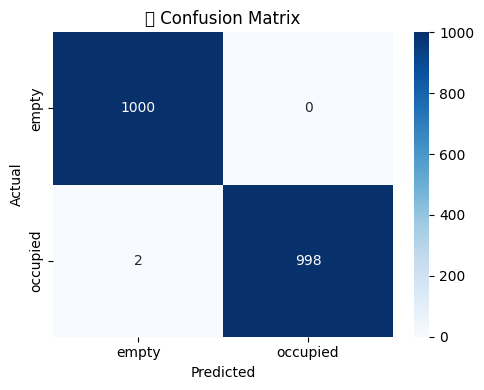


📋 Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00      1000
    occupied       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



C:\Users\Dafa\AppData\Local\Temp\ipykernel_22328\1841166565.py:54: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dafa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


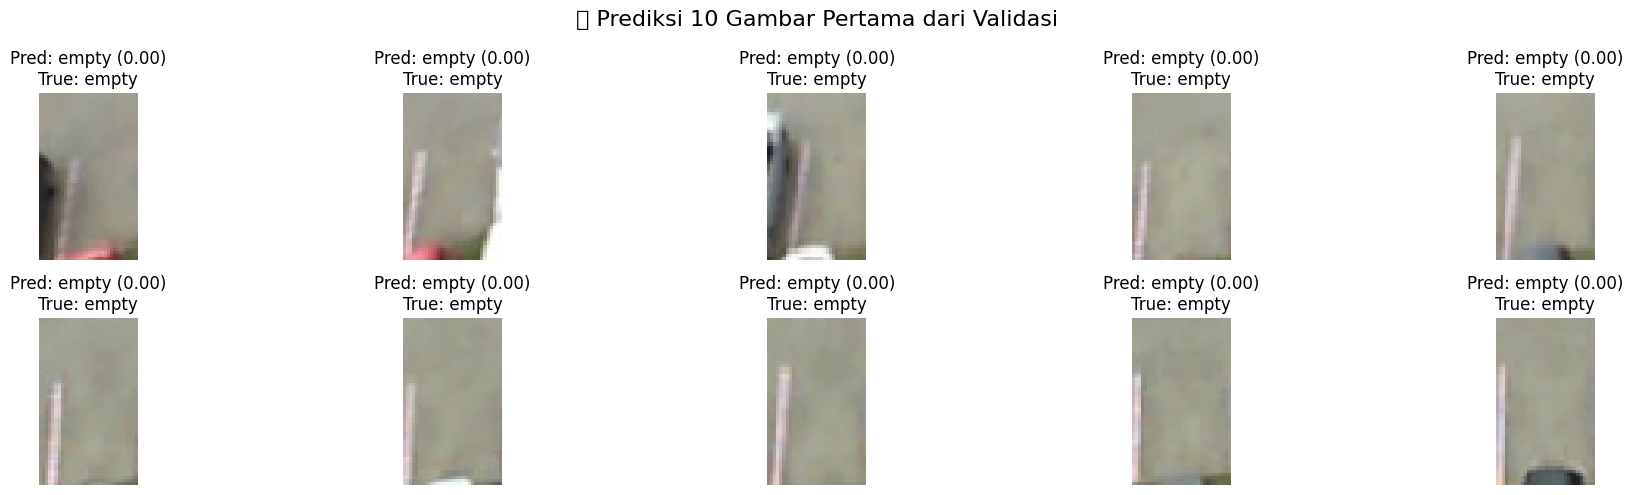

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = tf.keras.models.load_model("parking_cnn_best.h5")

# Evaluasi akhir menggunakan validasi data
val_data.reset()  # Reset untuk menghindari error saat prediksi
pred_probs = model.predict(val_data)
pred_labels = (pred_probs > 0.5).astype("int32").flatten()
true_labels = val_data.classes
class_names = list(val_data.class_indices.keys())

# Print akurasi
loss, acc = model.evaluate(val_data, verbose=0)
print(f"\n📊 Final Validation Accuracy: {acc:.4f}")
print(f"📉 Final Validation Loss: {loss:.4f}")

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧠 Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))


# Ambil 1 batch pertama dari validasi (pastikan batch_size >= 10)
val_data.reset()  # Penting agar ambil batch dari awal
images, labels = next(val_data)

# Buat prediksi pada 10 gambar pertama
plt.figure(figsize=(20, 5))
for i in range(10):
    img = images[i]
    true_label = int(labels[i])
    pred_prob = model.predict(np.expand_dims(img, axis=0), verbose=0)[0][0]
    pred_label = int(pred_prob > 0.5)

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {class_names[pred_label]} ({pred_prob:.2f})\nTrue: {class_names[true_label]}")
plt.suptitle("📷 Prediksi 10 Gambar Pertama dari Validasi", fontsize=16)
plt.tight_layout()
plt.show()
